# Importing Dependecies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Importing Dataset 

In [2]:

# Load Breast Cancer dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
labels = data.target  # Keeping labels for evaluation

# Drop label column for clustering
df_for_clustering = df.drop(columns=['mean radius'])  # Replace 'mean radius' with appropriate label column

# Task 1 

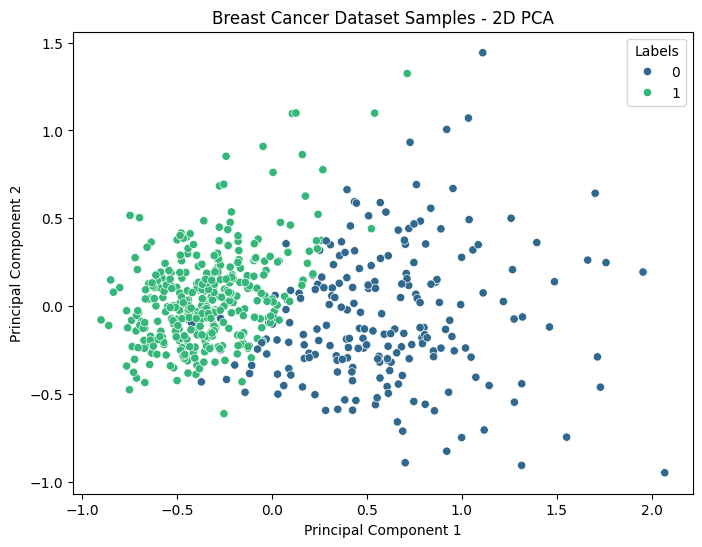

Class count in dataset:
1    357
0    212
Name: count, dtype: int64


In [3]:

# Check for categorical variables
categorical_cols = [col for col in df_for_clustering.columns if df_for_clustering[col].dtype == 'object']

if len(categorical_cols) > 0:
    # Perform one-hot encoding for categorical variables
    df_for_clustering = pd.get_dummies(df_for_clustering, columns=categorical_cols)
else:
    # Scale data using Min-Max Scaler if no categorical variables found
    scaler = MinMaxScaler()
    df_for_clustering = scaler.fit_transform(df_for_clustering)

# Perform PCA on data
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_for_clustering)

# Visualize data samples using 2D scatter plot
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['labels'] = labels  # Adding labels for coloring

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='labels', data=pca_df, palette='viridis')
plt.title('Breast Cancer Dataset Samples - 2D PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Labels')
plt.show()

# EDA - Count of samples for each class
class_count = pd.Series(labels).value_counts()
print("Class count in dataset:")
print(class_count)

Class 1 has most samples

# Task 2

In [4]:

def initialize_centroids(data, k):
    num_samples, _ = data.shape
    indices = np.random.choice(num_samples, k, replace=False)
    centroids = data[indices]
    return centroids

def assign_to_clusters(data, centroids):
    num_samples = len(data)
    num_centroids = len(centroids)
    distances = np.zeros((num_samples, num_centroids))

    for i in range(num_centroids):
        centroid = centroids[i]
        # Calculate Euclidean distance between each data point and centroid
        distances[:, i] = np.linalg.norm(data - centroid, axis=1)

    cluster_assignment = np.argmin(distances, axis=1)
    return cluster_assignment

def update_centroids(data, cluster_assignment, k):
    centroids = np.zeros((k, data.shape[1]))
    for i in range(k):
        cluster_points = data[cluster_assignment == i]
        centroids[i] = np.mean(cluster_points, axis=0)
    return centroids

def k_means(data, k, max_iterations=100):
    centroids = initialize_centroids(data, k)
    for _ in range(max_iterations):
        cluster_assignment = assign_to_clusters(data, centroids)
        new_centroids = update_centroids(data, cluster_assignment, k)
        # Check for convergence
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
    return centroids, cluster_assignment

# Task 3

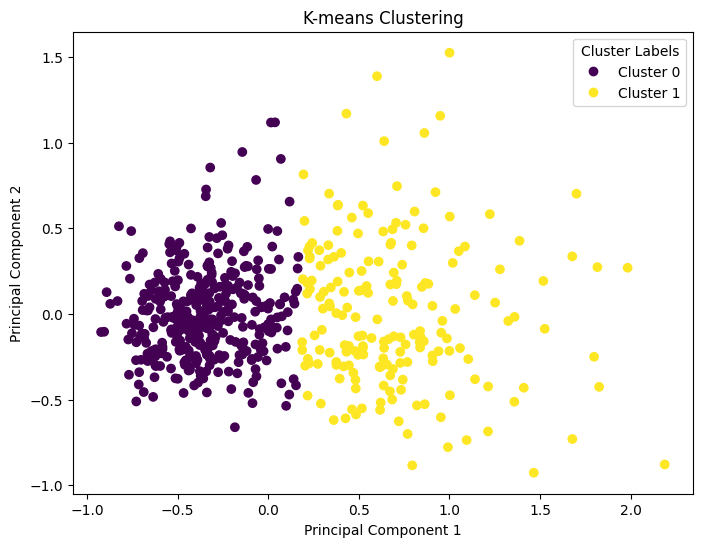

Accuracy based on cluster size: 0.07205623901581722


In [11]:

# Load Breast Cancer dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
labels = data.target

# Scale data using Min-Max Scaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

# Perform PCA on scaled data for visualization
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(df_scaled)

# Perform K-means clustering with 2 clusters using PCA-transformed data
centroids, cluster_labels = k_means(df_scaled, k=2)

# Visualize data samples using 2D scatter plot with clustering labels as colors
plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cluster_labels, cmap='viridis')
plt.legend(handles=scatter.legend_elements()[0], labels=['Cluster 0', 'Cluster 1'], title='Cluster Labels')

plt.title('K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
plt.show()

# Assign labels based on cluster size (from previous code snippet)
cluster0_count = (cluster_labels == 0).sum()
cluster1_count = (cluster_labels == 1).sum()

predicted_labels = []
for i in range(len(cluster_labels)):
    if cluster0_count >= cluster1_count:
        predicted_labels.append(0 if cluster_labels[i] == 0 else 1)
    else:
        predicted_labels.append(1 if cluster_labels[i] == 1 else 0)

# Evaluate performance using predicted labels
accuracy = accuracy_score(labels, predicted_labels)
print(f"Accuracy based on cluster size: {accuracy}")


# Task 4

Evaluation Metrics:
Accuracy: 0.6274165202108963
Precision: 0.3936514898335501
Recall: 0.6274165202108963
F1-score: 0.48377472508701935


c:\Users\Cr7th\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

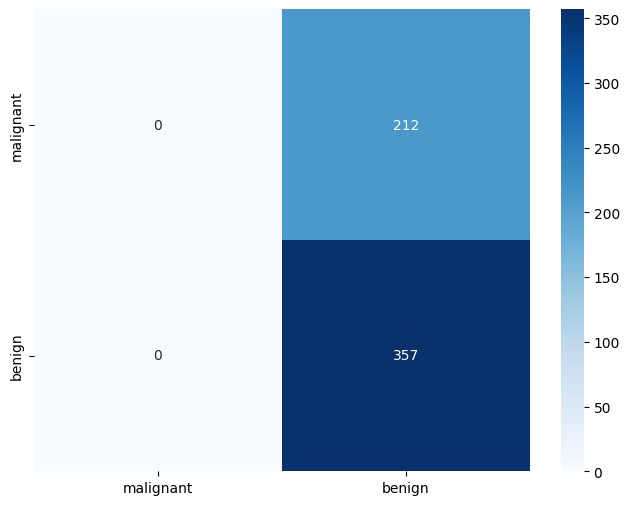

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
true_labels = data.target  # Assuming 'data' is the loaded Breast Cancer dataset

# Calculating metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

# Generating confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Displaying metrics and confusion matrix
print("Evaluation Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
# Plotting confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=data.target_names, yticklabels=data.target_names)


# Task 5

c:\Users\Cr7th\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


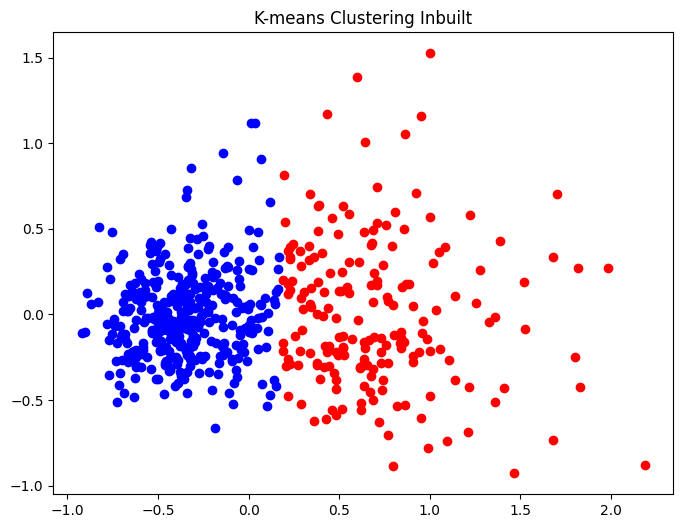

Evaluation Metrics using sklearn KMeans:
Accuracy: 0.6274165202108963
Precision: 0.3936514898335501
Recall: 0.6274165202108963
F1-score: 0.48377472508701935

Confusion Matrix using sklearn KMeans:
[[  0 212]
 [  0 357]]


c:\Users\Cr7th\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [7]:

from sklearn.cluster import KMeans

# Load Breast Cancer dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
labels = data.target

# Scale data using Min-Max Scaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

# Perform PCA on scaled data for visualization
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(df_scaled)

# Perform K-means clustering with 2 clusters using PCA-transformed data (using sklearn's KMeans)
kmeans_sklearn = KMeans(n_clusters=2, random_state=42)
cluster_labels_sklearn = kmeans_sklearn.fit_predict(df_scaled)

# Plotting data with cluster labels as colors (without legend)
plt.figure(figsize=(8, 6))
for i in range(len(cluster_labels_sklearn)):
    if cluster_labels_sklearn[i] == 0:
        plt.scatter(pca_result[i, 0], pca_result[i, 1], color='red')
    else:
        plt.scatter(pca_result[i, 0], pca_result[i, 1], color='blue')
plt.title('K-means Clustering Inbuilt')
plt.xlabel('')
plt.ylabel('')
plt.show()

# Assign labels based on cluster size
cluster0_count = (cluster_labels_sklearn == 0).sum()
cluster1_count = (cluster_labels_sklearn == 1).sum()

predicted_labels_sklearn = []
for i in range(len(cluster_labels_sklearn)):
    if cluster_labels_sklearn[i] == 0:
        predicted_labels_sklearn.append(0 if cluster0_count >= cluster1_count else 1)
    else:
        predicted_labels_sklearn.append(1 if cluster1_count >= cluster0_count else 0)

# Evaluate performance using predicted labels
accuracy_sklearn = accuracy_score(labels, predicted_labels_sklearn)
precision_sklearn = precision_score(labels, predicted_labels_sklearn, average='weighted')
recall_sklearn = recall_score(labels, predicted_labels_sklearn, average='weighted')
f1_sklearn = f1_score(labels, predicted_labels_sklearn, average='weighted')
conf_matrix_sklearn = confusion_matrix(labels, predicted_labels_sklearn)

# Display evaluation metrics and confusion matrix
print("Evaluation Metrics using sklearn KMeans:")
print(f"Accuracy: {accuracy_sklearn}")
print(f"Precision: {precision_sklearn}")
print(f"Recall: {recall_sklearn}")
print(f"F1-score: {f1_sklearn}")
print("\nConfusion Matrix using sklearn KMeans:")
print(conf_matrix_sklearn)

My kmeans and inbuilt kmeans result metrics are similar. It indicates that both implementations are producing comparable clustering results on the given dataset.



# Task 6

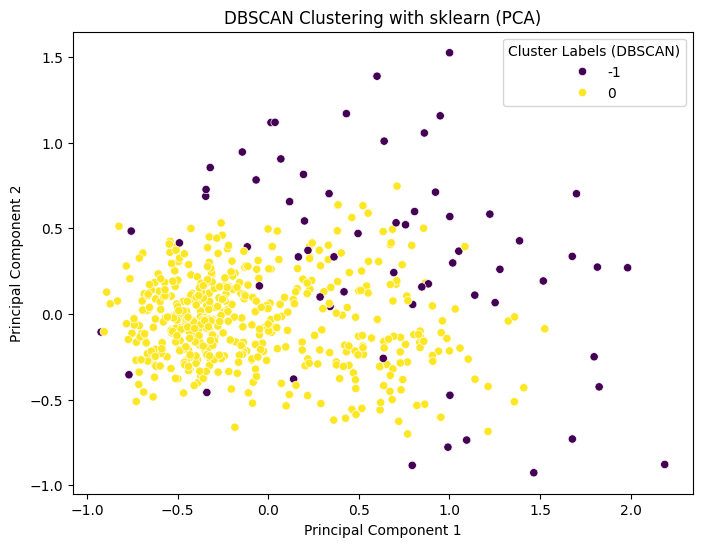

Evaluation Metrics for DBSCAN:
Accuracy: 0.33663366336633666
Precision: 0.11332222331144007
Recall: 0.33663366336633666
F1-score: 0.16956362302896955

Confusion Matrix for DBSCAN:
[[170   0]
 [335   0]]


c:\Users\Cr7th\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
from sklearn.cluster import DBSCAN  # Importing DBSCAN from sklearn.cluster

# Load Breast Cancer dataset
data = load_breast_cancer()
X = data.data

# Scale the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Perform DBSCAN clustering using sklearn's DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # You can adjust parameters like eps and min_samples
dbscan_predicted_labels = dbscan.fit_predict(X_scaled)

# Visualizing the clustered data using PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=dbscan_predicted_labels, palette='viridis')
plt.title('DBSCAN Clustering with sklearn (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster Labels (DBSCAN)')
plt.show()

# Evaluate DBSCAN clustering
true_labels = data.target

# Exclude noise (-1 label) from evaluation metrics
dbscan_predicted_labels_clean = dbscan_predicted_labels[dbscan_predicted_labels != -1]
true_labels_clean = true_labels[dbscan_predicted_labels != -1]

accuracy_dbscan = accuracy_score(true_labels_clean, dbscan_predicted_labels_clean)
precision_dbscan = precision_score(true_labels_clean, dbscan_predicted_labels_clean, average='weighted')
recall_dbscan = recall_score(true_labels_clean, dbscan_predicted_labels_clean, average='weighted')
f1_dbscan = f1_score(true_labels_clean, dbscan_predicted_labels_clean, average='weighted')

conf_matrix_dbscan = confusion_matrix(true_labels_clean, dbscan_predicted_labels_clean)

# Display evaluation metrics and confusion matrix for DBSCAN
print("Evaluation Metrics for DBSCAN:")
print(f"Accuracy: {accuracy_dbscan}")
print(f"Precision: {precision_dbscan}")
print(f"Recall: {recall_dbscan}")
print(f"F1-score: {f1_dbscan}")

print("\nConfusion Matrix for DBSCAN:")
print(conf_matrix_dbscan)


K-means shows comparatively better performance in terms of clustering quality based on the provided evaluation metrics.
DBSCAN's poor performance in precision, recall, and the confusion matrix suggests that it might not have effectively identified meaningful clusters in the dataset or struggled to understand the underlying structure.

# Task 7

The comparative evaluation between K-means and DBSCAN clustering algorithms on the breast cancer dataset reveals distinct performance differences. K-means demonstrates superior clustering effectiveness, as indicated by its notably higher accuracy (0.627) and F1-score (0.484) compared to DBSCAN, which yielded lower accuracy (0.337) and a substantially lower F1-score (0.170). While K-means showed a moderate ability to identify clusters, DBSCAN struggled, evident from its considerably lower precision and recall values. Notably, the confusion matrix for DBSCAN displayed an inability to discern between classes, assigning all instances to a single class, indicative of an inability to capture the dataset's inherent structure. These findings underscore K-means' comparative strength in this context, emphasizing its relatively better performance in delineating meaningful clusters within the breast cancer dataset. However, further investigation might be needed to refine the clustering outcomes for this specific dataset.


# Task 8

c:\Users\Cr7th\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Cr7th\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Cr7th\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Cr7th\AppData\Local\Programs\Python\Python310\lib

K-means Clustering Performance:
Before PCA:
Accuracy: 0.07205623901581722, Precision: 0.06125242808250855, Recall: 0.07205623901581722, F1-score: 0.060963356218189255
After PCA:
Accuracy: 0.9279437609841827, Precision: 0.9294228541476716, Recall: 0.9279437609841827, F1-score: 0.9270016613230334

DBSCAN Clustering Performance:
Before PCA:
Accuracy: 0.29876977152899825, Precision: 0.1254241417111834, Recall: 0.29876977152899825, F1-score: 0.17667835861686926
After PCA:
Accuracy: 0.37082601054481545, Precision: 0.13840689125968464, Recall: 0.37082601054481545, F1-score: 0.2015772159884638


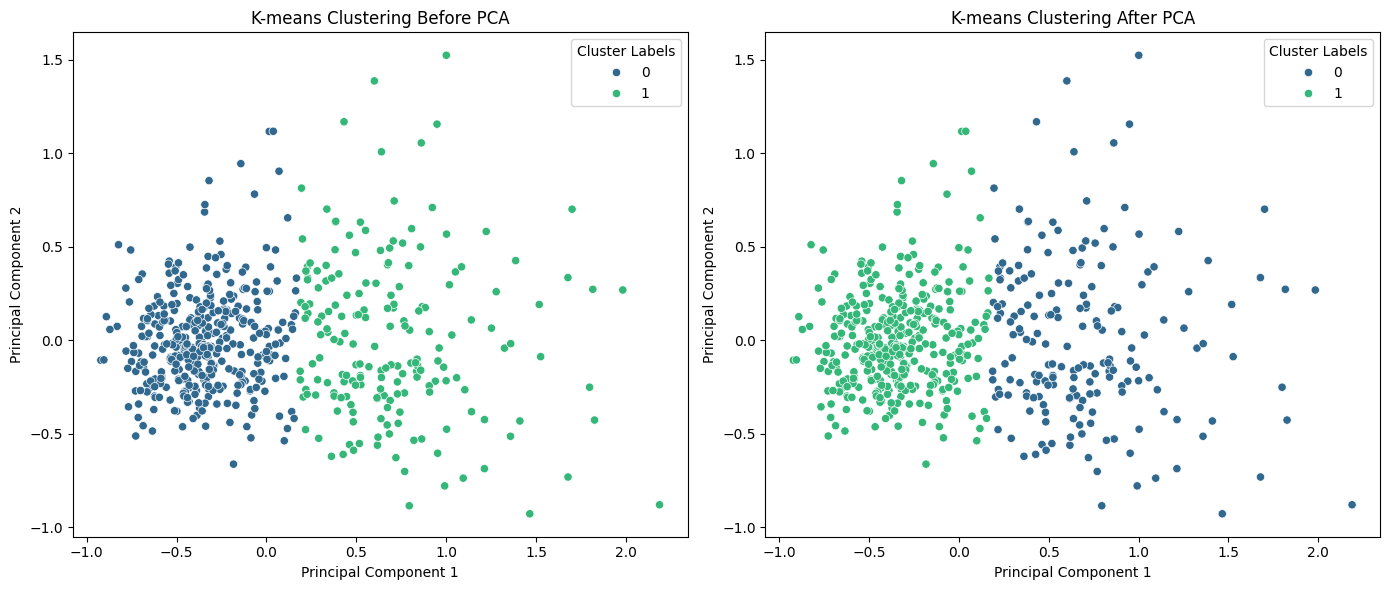

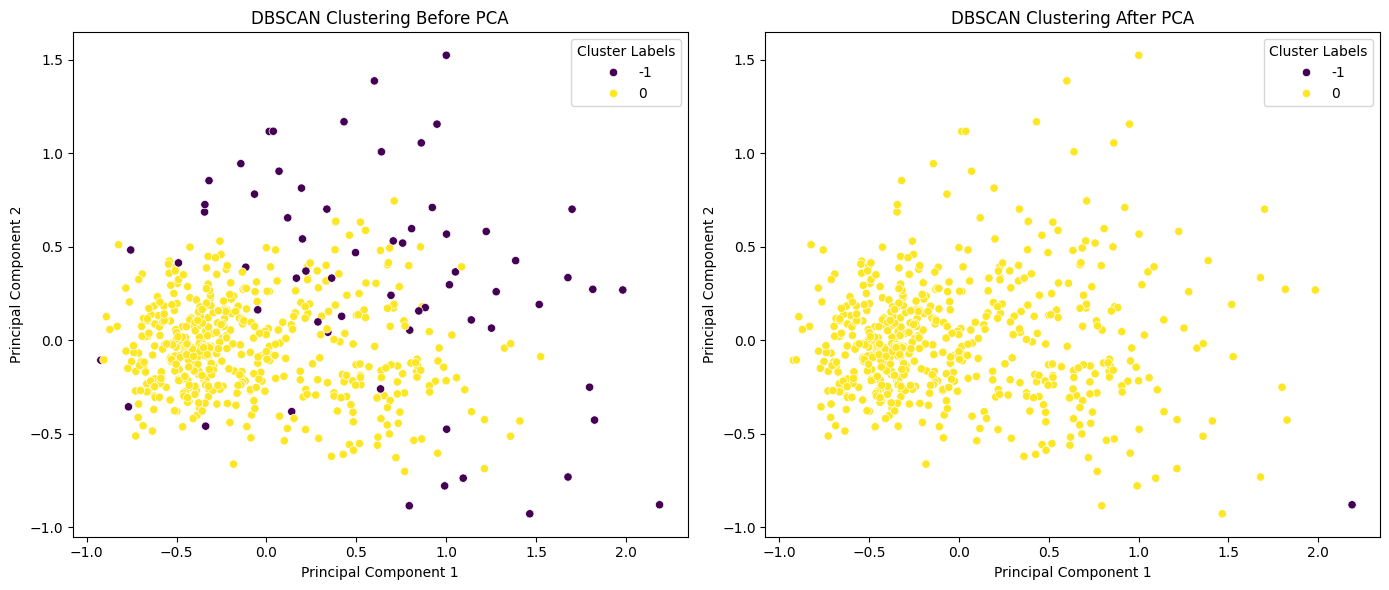

In [9]:
# Load Breast Cancer dataset
data = load_breast_cancer()
X = data.data

# Scale the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-means and DBSCAN clustering before PCA
kmeans_before_pca = KMeans(n_clusters=2)
kmeans_predicted_labels_before_pca = kmeans_before_pca.fit_predict(X_scaled)

dbscan_before_pca = DBSCAN(eps=0.5, min_samples=5)
dbscan_predicted_labels_before_pca = dbscan_before_pca.fit_predict(X_scaled)

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Perform K-means and DBSCAN clustering after PCA
kmeans_after_pca = KMeans(n_clusters=2)
kmeans_predicted_labels_after_pca = kmeans_after_pca.fit_predict(X_pca)

dbscan_after_pca = DBSCAN(eps=0.5, min_samples=5)
dbscan_predicted_labels_after_pca = dbscan_after_pca.fit_predict(X_pca)

# Evaluate K-means and DBSCAN clustering before and after PCA
true_labels = data.target

def evaluate_clustering(true_labels, predicted_labels):
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels, average='weighted')
    recall = recall_score(true_labels, predicted_labels, average='weighted')
    f1 = f1_score(true_labels, predicted_labels, average='weighted')
    return accuracy, precision, recall, f1

# Evaluate K-means and DBSCAN clustering before and after PCA
accuracy_kmeans_before_pca, precision_kmeans_before_pca, recall_kmeans_before_pca, f1_kmeans_before_pca = evaluate_clustering(true_labels, kmeans_predicted_labels_before_pca)
accuracy_kmeans_after_pca, precision_kmeans_after_pca, recall_kmeans_after_pca, f1_kmeans_after_pca = evaluate_clustering(true_labels, kmeans_predicted_labels_after_pca)

accuracy_dbscan_before_pca, precision_dbscan_before_pca, recall_dbscan_before_pca, f1_dbscan_before_pca = evaluate_clustering(true_labels, dbscan_predicted_labels_before_pca)
accuracy_dbscan_after_pca, precision_dbscan_after_pca, recall_dbscan_after_pca, f1_dbscan_after_pca = evaluate_clustering(true_labels, dbscan_predicted_labels_after_pca)

print("K-means Clustering Performance:")
print("Before PCA:")
print(f"Accuracy: {accuracy_kmeans_before_pca}, Precision: {precision_kmeans_before_pca}, Recall: {recall_kmeans_before_pca}, F1-score: {f1_kmeans_before_pca}")
print("After PCA:")
print(f"Accuracy: {accuracy_kmeans_after_pca}, Precision: {precision_kmeans_after_pca}, Recall: {recall_kmeans_after_pca}, F1-score: {f1_kmeans_after_pca}")

print("\nDBSCAN Clustering Performance:")
print("Before PCA:")
print(f"Accuracy: {accuracy_dbscan_before_pca}, Precision: {precision_dbscan_before_pca}, Recall: {recall_dbscan_before_pca}, F1-score: {f1_dbscan_before_pca}")
print("After PCA:")
print(f"Accuracy: {accuracy_dbscan_after_pca}, Precision: {precision_dbscan_after_pca}, Recall: {recall_dbscan_after_pca}, F1-score: {f1_dbscan_after_pca}")

# Visualize clustered data before and after PCA for K-means
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.title('K-means Clustering Before PCA')
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_predicted_labels_before_pca, palette='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster Labels')

plt.subplot(1, 2, 2)
plt.title('K-means Clustering After PCA')
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_predicted_labels_after_pca, palette='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster Labels')

plt.tight_layout()
plt.show()

# Visualize clustered data before and after PCA for DBSCAN
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.title('DBSCAN Clustering Before PCA')
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=dbscan_predicted_labels_before_pca, palette='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster Labels')

plt.subplot(1, 2, 2)
plt.title('DBSCAN Clustering After PCA')
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=dbscan_predicted_labels_after_pca, palette='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster Labels')

plt.tight_layout()
plt.show()